In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

MNIST data is 28*28  
so the number of neurons = 784  
so the number of pattern for sure we can save for 100%:  
n < 784 / (4 * ln(784))   
n = 29  
We have 0 to 9 numbers in MNIST > So we must be able to save these 10 patterns

In [79]:
df = pd.read_csv("./Datasets/MNIST/mnist_train.csv")
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X = df.to_numpy()

np.random.seed = 0
# np.random.shuffle(X) > for one array better
X = X[np.random.permutation(X.shape[0])]

y = X[:,0]
X = X[:,1:]

(784,)
0 255


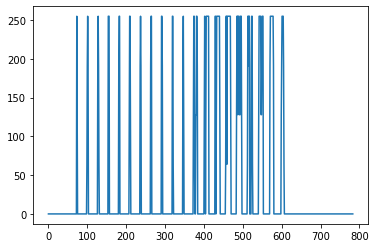

In [81]:
print(X[0].shape)
print(X[0].min(), X[0].max())
plt.plot(X[0])

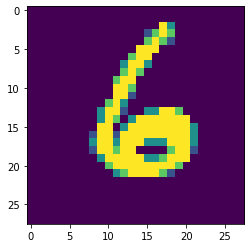

In [82]:
# for display one image > 2d > 28*28 > imshow
plt.imshow(X[0].reshape(28,28))
# imshow > 0,0 is top left > the image standard axis

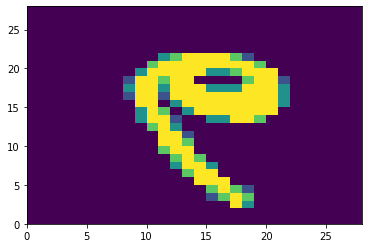

In [83]:
# 0,0 is bottom left > upside down the image > so bad for image
plt.pcolormesh(X[0].reshape(28,28))

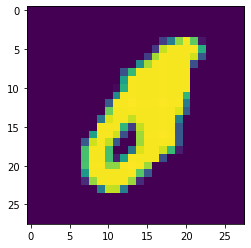

In [84]:
# We need teh base patterns
X0 = X[y==0][0]
plt.imshow(X0.reshape(28,28))

In [85]:
print(X[y==0].shape)
# mean of each pixel
print(np.mean(X[y==0], axis=0))
# mean of all images
print(np.mean(X[y==0], axis=1))
print(np.mean(X[y==0], axis=1).shape)

(5923, 784)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.16106703e-02
 4.27148405e-02 1.75586696e-02 0.00000000e+00 1.51950025e-02
 4.15330069e-02 1.97535033e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.89616748e-03
 1.68833361e-03 0.00000000e+00 1.43508357e-02 3.37666723e-02
 7.42866790e

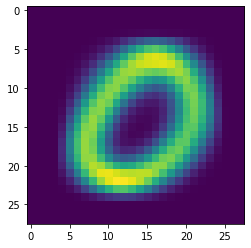

In [86]:
X_img = np.mean(X[y==0],axis=0)
plt.imshow(X_img.reshape(28,28))

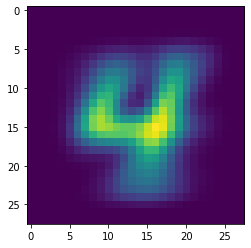

In [87]:
X_img = np.mean(X[y==4],axis=0)
plt.imshow(X_img.reshape(28,28))

In [88]:
# We want to show the mean image as a pattern to the SOM
# we have to have binary neurons
X_img = np.mean(X[y==0],axis=0)
print(X_img.min(), X_img.max()) #0,255


0.0 201.6035792672632


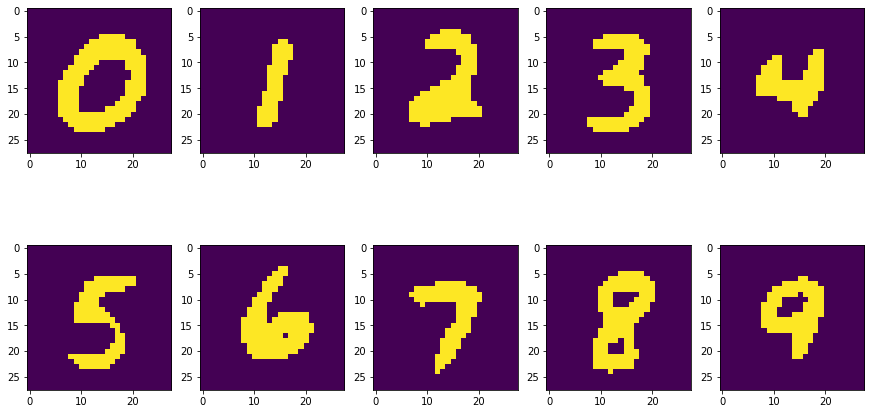

In [89]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,8))

for i in range(10):
    X_img = np.mean(X[y==i],axis=0)
    if i>4:
        axs[1][i-5].imshow((X_img > 100).reshape(28,28))
        continue
    axs[0][i].imshow((X_img > 100).reshape(28,28))

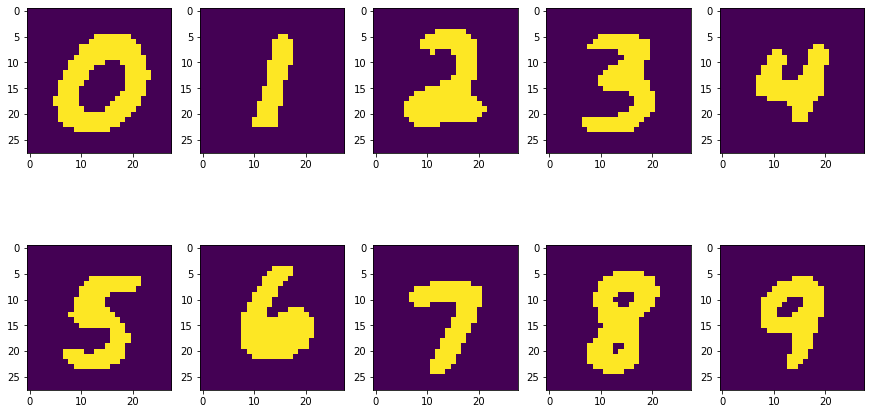

In [90]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,8))

for i in range(10):
    X_img = np.mean(X[y==i],axis=0)
    if i>4:
        axs[1][i-5].imshow((X_img > 85).reshape(28,28))
        continue
    axs[0][i].imshow((X_img > 85).reshape(28,28))

plt.show()

In [91]:
P = np.zeros((784,10))
for i in range(10):
    X_img = np.mean(X[y==i],axis=0)
    P[:,i] = X_img > 100

In [92]:
P[:,0].min(), P[:,0].max() # we want them to be -1,1

(0.0, 1.0)

In [93]:
# the input of network
P = np.zeros((784,10))
for i in range(10):
    X_img = np.mean(X[y==i],axis=0)
    P[:,i] = X_img > 100
    P[:,i] = P[:,i] * 2
    P[:,i] = P[:,i] -1
P[:,0].min(), P[:,0].max()

(-1.0, 1.0)

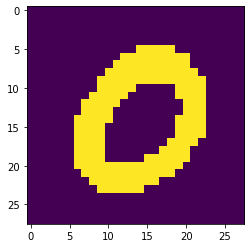

In [94]:
plt.imshow(P[:,0].reshape(28,28))

In [116]:
# in this network all neurons are connected to each other > so square 784
w = np.zeros((784,784))
# in this W > the diagonal elements should be 0
# also it is semetric: w[i,j] = w[j,i]
for i in range(784):
    for j in range(i+1, 784):
        for k in range(10):
            w[i,j] += 1/10 * (P[i,k] * P[j,k]) #dot product
            w[j,i] = w[i,j]
w

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

(array([2.80000e+01, 2.61400e+04, 3.62160e+04, 5.47640e+04, 8.62000e+03,
        1.00320e+05, 0.00000e+00, 4.05320e+04, 4.09340e+04, 3.07102e+05]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

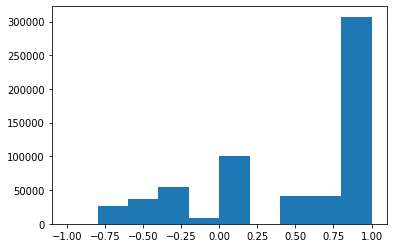

In [117]:
plt.hist(w.reshape(-1))

(60000, 784)
(784,)


Text(0.5, 1.0, 'Output')

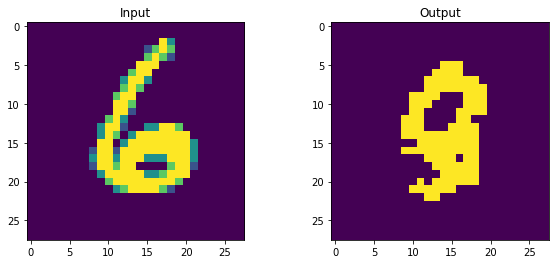

In [118]:
# the training of hopfiled is over
print(X.shape)

sample_input = X[0]
# must be binary because p was binary as an input
sample_input = (sample_input > 100) *2 -1
out = np.sign(np.dot(sample_input, w))
print(out.shape)

# after one step
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axs[0].imshow(X[0].reshape(28,28))
axs[0].set_title("Input")
axs[1].imshow(out.reshape(28,28))
axs[1].set_title("Output")

Text(0.5, 1.0, 'Output')

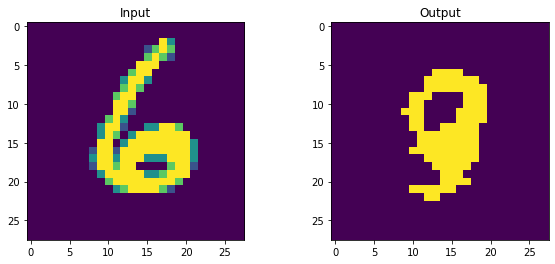

In [119]:
sample_input = X[0]
# must be binary because p was binary as an input
sample_input = (sample_input > 100) * 2 -1
out = np.sign(np.dot(sample_input, w))
out = np.sign(np.dot(out, w))
out = np.sign(np.dot(out, w))

# after 3 steps
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axs[0].imshow(X[0].reshape(28,28))
axs[0].set_title("Input")
axs[1].imshow(out.reshape(28,28))
axs[1].set_title("Output")

In [120]:
X.min(), X.max()

(0, 255)

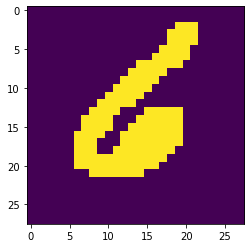

In [121]:
X_binary = (X > 100) * 2 - 1
plt.imshow(X_binary[1].reshape(28,28))

In [122]:
def get_hopfield_out(sample_input, w):
    network_z = sample_input.copy()
    while True:
        network_z_new = np.sign(np.dot(network_z,w))
        print(np.sum((network_z_new - network_z) ** 2))
        # because we have -1,1
        if np.sum((network_z_new - network_z) ** 2) < 1:
            break
        network_z = network_z_new
    return network_z

10762701.0
288.0
32.0
4.0
0.0


Text(0.5, 1.0, 'Output')

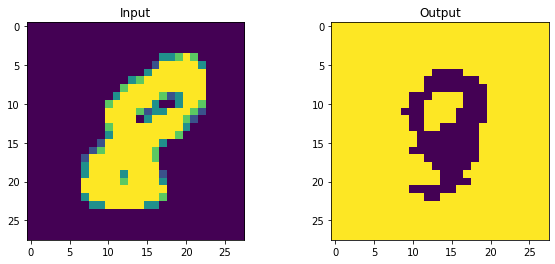

In [125]:
inp = X[3]
out = get_hopfield_out(inp,w)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axs[0].imshow(inp.reshape(28,28))
axs[0].set_title("Input")
axs[1].imshow(out.reshape(28,28))
axs[1].set_title("Output")

432.0
68.0
8.0
0.0


Text(0.5, 1.0, 'Output')

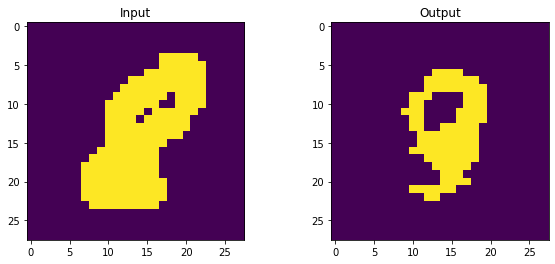

In [127]:
inp = X_binary[3]
out = get_hopfield_out(inp,w)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axs[0].imshow(inp.reshape(28,28))
axs[0].set_title("Input")
axs[1].imshow(out.reshape(28,28))
axs[1].set_title("Output")